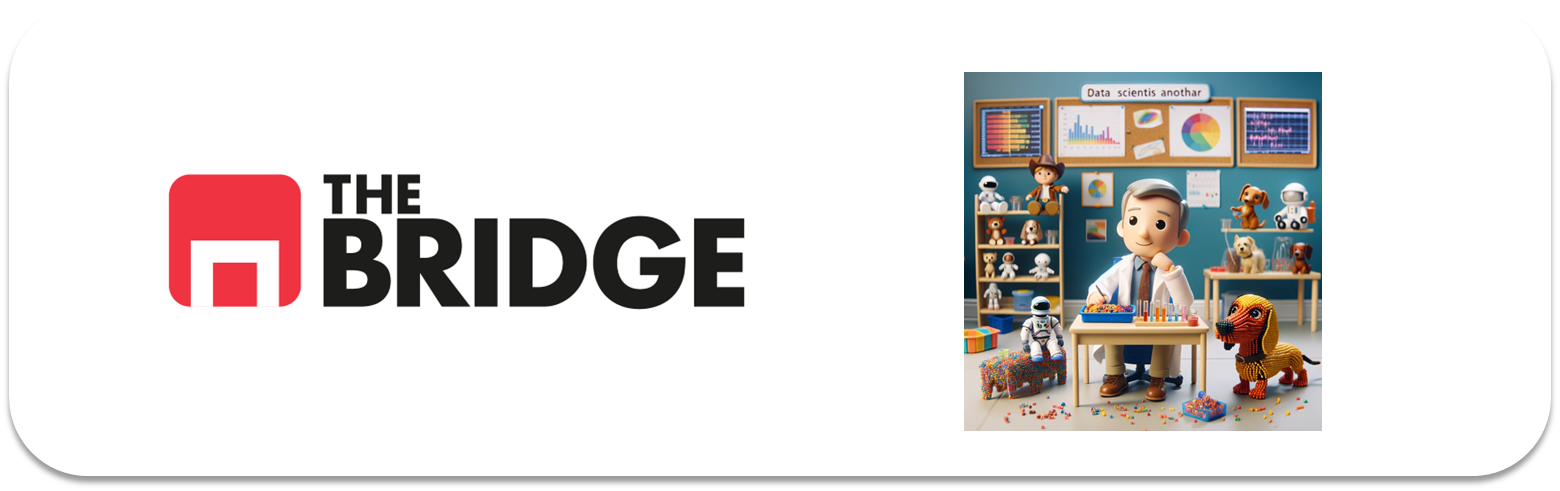

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [132]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [199]:
df_titanic = sns.load_dataset('titanic')

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [200]:
df_titanic.sample(15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
783,0,3,male,NaN,1,2,23.4500,S,Third,man,True,NaN,Southampton,no,False
191,0,2,male,19.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
343,0,2,male,25.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
65,1,3,male,NaN,1,1,15.2458,C,Third,man,True,NaN,Cherbourg,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
424,0,3,male,18.0,1,1,20.2125,S,Third,man,True,NaN,Southampton,no,False
495,0,3,male,NaN,0,0,14.4583,C,Third,man,True,NaN,Cherbourg,no,True
382,0,3,male,32.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
474,0,3,female,22.0,0,0,9.8375,S,Third,woman,False,NaN,Southampton,no,True


In [201]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [202]:
def sacar_nulos(df, columnas):
    for col in columnas:
        print(f'Para {col}')
        porcentaje = df[col].isnull().mean()*100
        cantidad = df[col].value_counts(dropna=False)
        print(round(porcentaje,2))
        print('\n')
        print(cantidad)
        print('\n'*2)

In [203]:
cols = ['age', 'embarked', 'deck', 'embark_town']
sacar_nulos(df_titanic, cols)

Para age
19.87


age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 89, dtype: int64



Para embarked
0.22


embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64



Para deck
77.22


deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64



Para embark_town
0.22


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64





In [204]:
moda= df_titanic.embarked.mode()[0]
df_titanic.embarked.fillna(moda, inplace=True)

C:\Users\pacoi\AppData\Local\Temp\ipykernel_33888\1072960670.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic.embarked.fillna(moda, inplace=True)


In [205]:
df_titanic.embarked.value_counts(dropna=False)

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [206]:
#df_titanic.embark_town.mode()[0]
df_titanic.embark_town.fillna(df_titanic.embark_town.mode()[0], inplace=True)

C:\Users\pacoi\AppData\Local\Temp\ipykernel_33888\2011782593.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic.embark_town.fillna(df_titanic.embark_town.mode()[0], inplace=True)


In [207]:
df_titanic.embark_town.value_counts(dropna=False)

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [208]:
mediana = df_titanic.age.median()
df_titanic.fillna({'age':mediana}, inplace=True)

In [209]:
df_titanic.drop(columns = ['deck', 'parch'], inplace=True)

In [210]:
df_titanic['age'] = df_titanic['age'].astype('int')

In [211]:
columnas_numericas = df_titanic.describe().columns.to_list()
columnas_str = df_titanic.columns.to_list()

In [212]:
columnas = [col for col in columnas_str if col not in columnas_numericas and df_titanic[col].dtypes != 'bool']
def espacios_formato(df, colum):
    for col in colum:
        df[col] = df[col].astype('str').str.strip().str.capitalize()
    print(df_titanic)

In [213]:
espacios_formato(df_titanic, columnas)

     survived  pclass     sex  age  sibsp     fare embarked   class    who  \
0           0       3    Male   22      1   7.2500        S   Third    Man   
1           1       1  Female   38      1  71.2833        C   First  Woman   
2           1       3  Female   26      0   7.9250        S   Third  Woman   
3           1       1  Female   35      1  53.1000        S   First  Woman   
4           0       3    Male   35      0   8.0500        S   Third    Man   
..        ...     ...     ...  ...    ...      ...      ...     ...    ...   
886         0       2    Male   27      0  13.0000        S  Second    Man   
887         1       1  Female   19      0  30.0000        S   First  Woman   
888         0       3  Female   28      1  23.4500        S   Third  Woman   
889         1       1    Male   26      0  30.0000        C   First    Man   
890         0       3    Male   32      0   7.7500        Q   Third    Man   

     adult_male  embark_town alive  alone  
0          True  So

In [214]:
df_titanic['adult_male'] = False

In [215]:
df_titanic.loc[df_titanic['age']>=18, 'adult_male'] = True

In [216]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    int64  
 4   sibsp        891 non-null    int64  
 5   fare         891 non-null    float64
 6   embarked     891 non-null    object 
 7   class        891 non-null    object 
 8   who          891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  891 non-null    object 
 11  alive        891 non-null    object 
 12  alone        891 non-null    bool   
dtypes: bool(2), float64(1), int64(4), object(6)
memory usage: 78.4+ KB


In [217]:
df_titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


In [218]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,Male,22,1,7.2500,S,Third,Man,True,Southampton,No,False
1,1,1,Female,38,1,71.2833,C,First,Woman,True,Cherbourg,Yes,False
2,1,3,Female,26,0,7.9250,S,Third,Woman,True,Southampton,Yes,True
3,1,1,Female,35,1,53.1000,S,First,Woman,True,Southampton,Yes,False
4,0,3,Male,35,0,8.0500,S,Third,Man,True,Southampton,No,True




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| Survived | Números de personas que han sobrevivido |
| Pclass | La clase del pasajero (primera, segunda, tercera) |
| Sex | El género de las personas |
| Age | La edad de las personas
| Sibsp | Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)|
| Fare | El precio del ticket |
| Embarked | Es la incial de la letra de la ciudad donde embarcó la persona |
| Class | La clase del pasajero (primera, segunda, tercera) |
| Who | El género de las personas |
| Adult_male | Si es adulto si tiene 18 o mas años |
| Embark_town | El lugar donde embarcaron |
| Alive | Si ha sobrevivido al titanic |
| Alone | Si iba solo/a en pasajero |




### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [219]:
def embarque(x):
    if x == 'S':
       return 'Belfast'
    elif x == 'C':
        return 'Cherburgo'
    else:
        return 'Queenstown'

In [220]:
df_titanic.embarked = df_titanic.embarked.apply(embarque)

In [221]:
df_titanic.embarked

0         Belfast
1       Cherburgo
2         Belfast
3         Belfast
4         Belfast
          ...    
886       Belfast
887       Belfast
888       Belfast
889     Cherburgo
890    Queenstown
Name: embarked, Length: 891, dtype: object

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

In [250]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [241]:
df_tipificacion = pd.DataFrame([df_titanic.nunique(), df_titanic.nunique()/len(df_titanic)*100, df_titanic.dtypes]).T.rename(columns={0:'Card', 1:'%_Card', 2:'Tipo'})

In [242]:
df_tipificacion

,Card,%_Card,Tipo
survived,2,0.224467,int64
pclass,3,0.3367,int64
sex,2,0.224467,object
age,71,7.968575,int64
sibsp,7,0.785634,int64
fare,248,27.833895,float64
embarked,3,0.3367,object
class,3,0.3367,object
who,3,0.3367,object
adult_male,2,0.224467,bool


In [243]:
#Cogemos el survived porque es binario

In [244]:
categoricas = ["survived","who","class","embarked","alone"]

In [245]:
numericas = ["age", "fare"]

In [270]:
df_categoricas = df_titanic[categoricas]

In [271]:
df_categoricas

,survived,who,class,embarked,alone
0,0,Man,Third,Belfast,False
1,1,Woman,First,Cherburgo,False
2,1,Woman,Third,Belfast,True
3,1,Woman,First,Belfast,False
4,0,Man,Third,Belfast,True
...,...,...,...,...,...
886,0,Man,Second,Belfast,True
887,1,Woman,First,Belfast,True
888,0,Woman,Third,Belfast,False
889,1,Man,First,Cherburgo,True


Absoluta survived
survived
0    549
1    342
Name: count, dtype: int64
Relativa survived
survived
0    61.616162
1    38.383838
Name: count, dtype: float64


Absoluta who
who
Man      537
Woman    271
Child     83
Name: count, dtype: int64
Relativa who
who
Man      60.269360
Woman    30.415264
Child     9.315376
Name: count, dtype: float64


Absoluta class
class
Third     491
First     216
Second    184
Name: count, dtype: int64
Relativa class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64


Absoluta embarked
embarked
Belfast       646
Cherburgo     168
Queenstown     77
Name: count, dtype: int64
Relativa embarked
embarked
Belfast       72.502806
Cherburgo     18.855219
Queenstown     8.641975
Name: count, dtype: float64


Absoluta alone
alone
True     537
False    354
Name: count, dtype: int64
Relativa alone
alone
True     60.26936
False    39.73064
Name: count, dtype: float64


ABSOLUTO


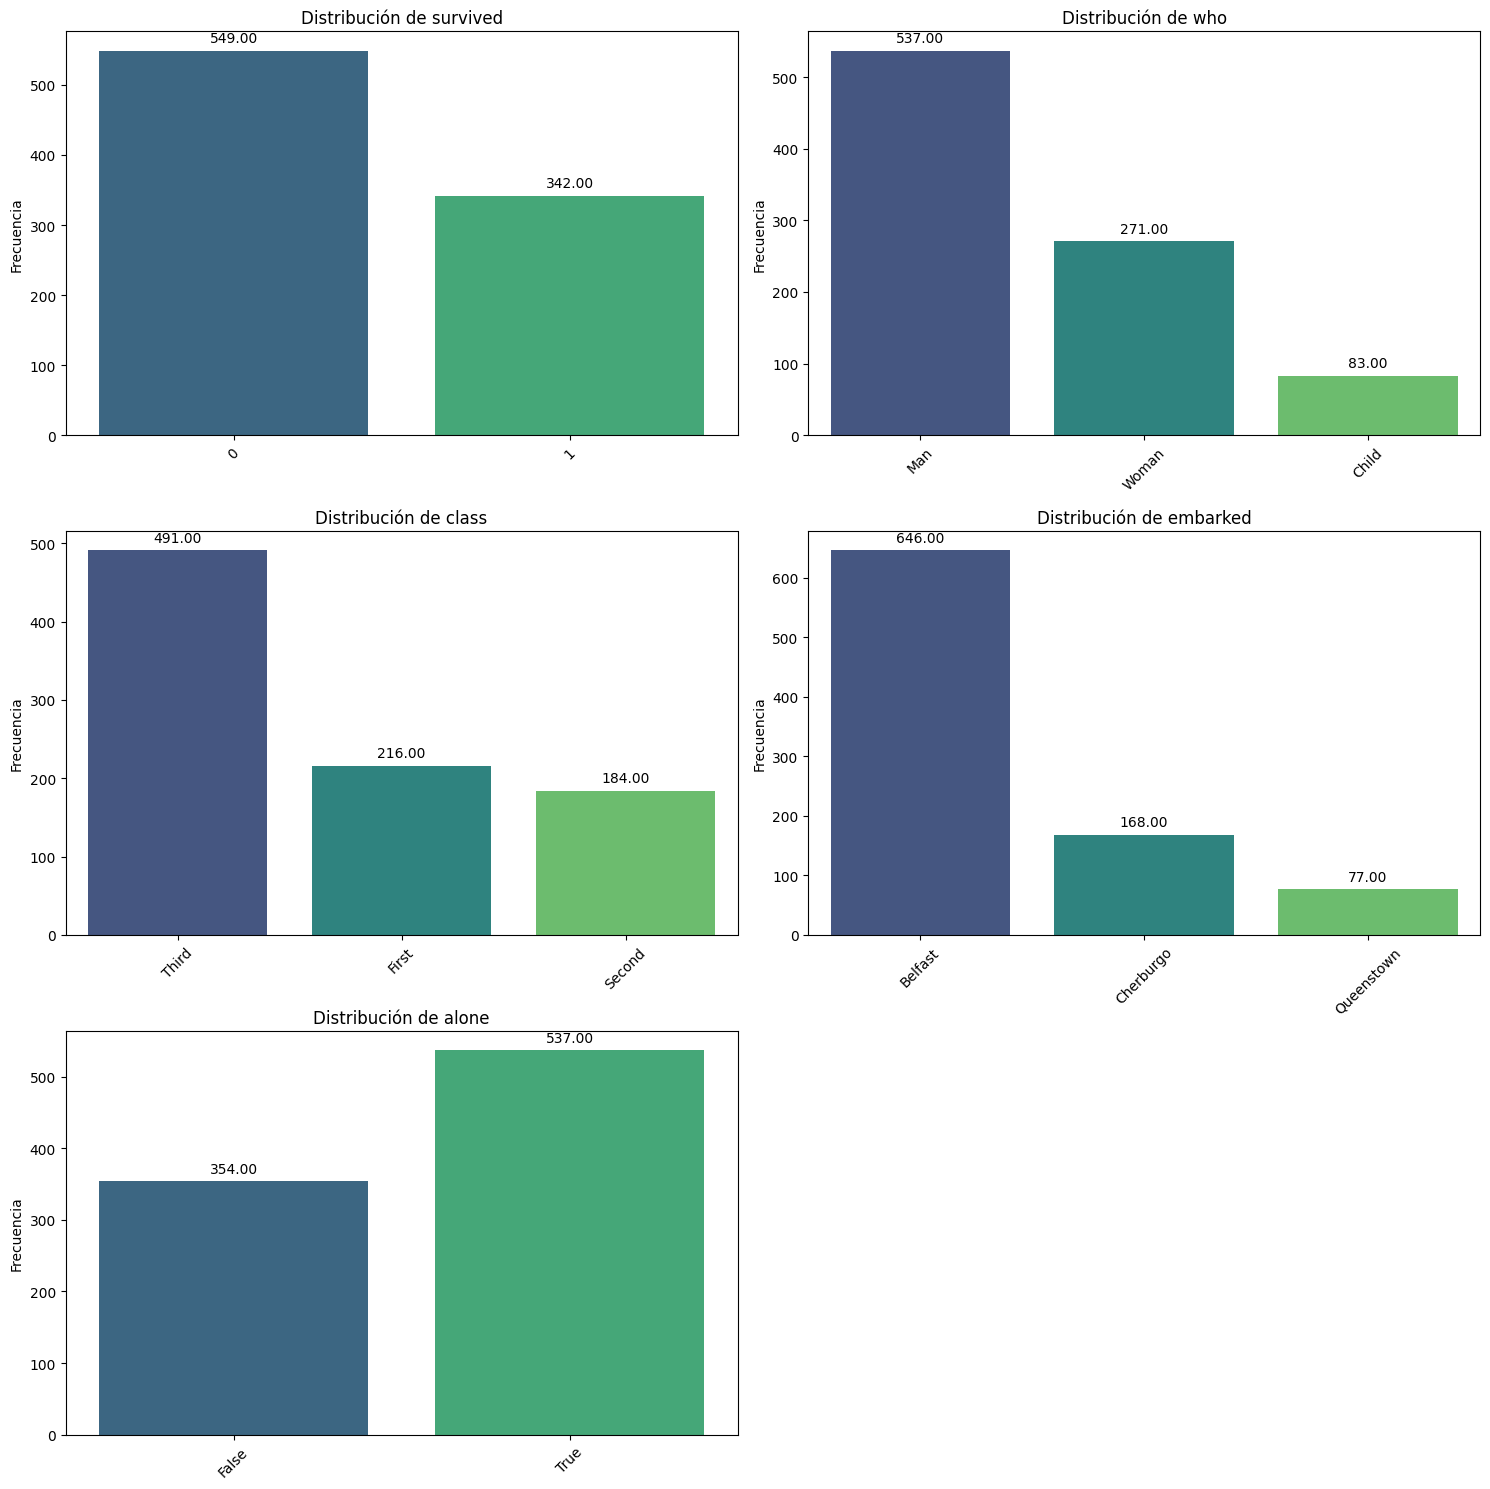

None
RELATIVO


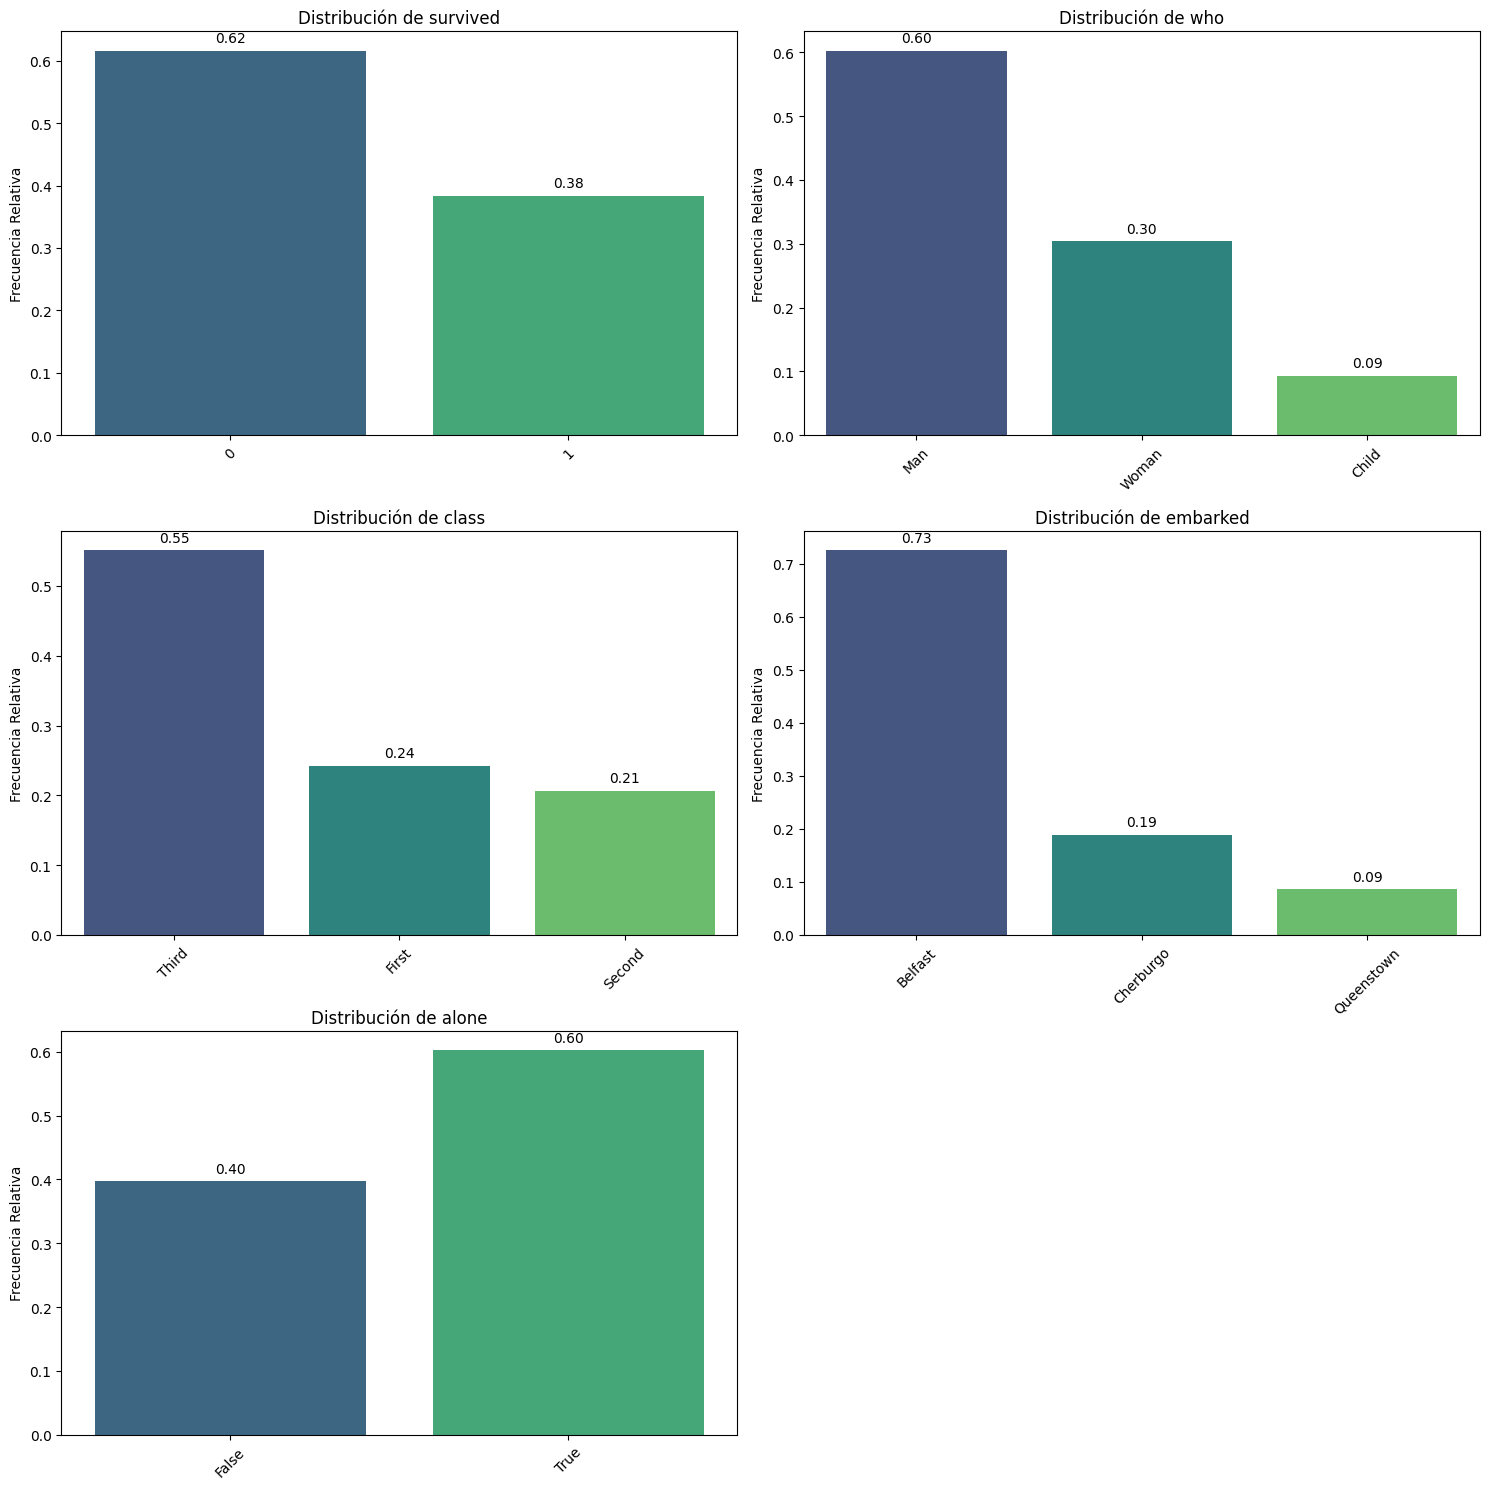

None


In [262]:
for col in df_categoricas:
    print(f'Absoluta {col}')
    print(df_categoricas[col].value_counts())
    print(f'Relativa {col}')
    print(df_categoricas[col].value_counts()/len(df_categoricas)*100)
    print('\n')
print('ABSOLUTO')
print(pinta_distribucion_categoricas(df_categoricas, categoricas, mostrar_valores = True))
print('RELATIVO')
print(pinta_distribucion_categoricas(df_categoricas, categoricas, relativa = True, mostrar_valores = True))

In [263]:
# SURVIVED: Vemos que el 38% de los pasajeros sobrevivieron, tiene pinta que sean las mujeres y un 10% de hombres
# WHO: Vemos que quien destaca son los hombres, esto es algo por la época en la que sucedió el titanic
# CLASS: La tercera clase es la que domina
# EMBARKED: Como no Belfast que es de dónde zarpó es donde tiene mas embarques
# ALONE: El 60% iban solos que son los mismos que los hombres

### #2.2 Numéricas

In [268]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

In [246]:
df_numericas = df_titanic[numericas]

In [273]:
df_numericas

,age,fare
0,22,7.2500
1,38,71.2833
2,26,7.9250
3,35,53.1000
4,35,8.0500
...,...,...
886,27,13.0000
887,19,30.0000
888,28,23.4500
889,26,30.0000


In [267]:
df_numericas.describe().age

count    891.000000
mean      29.345679
std       13.028212
min        0.000000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

(2,)


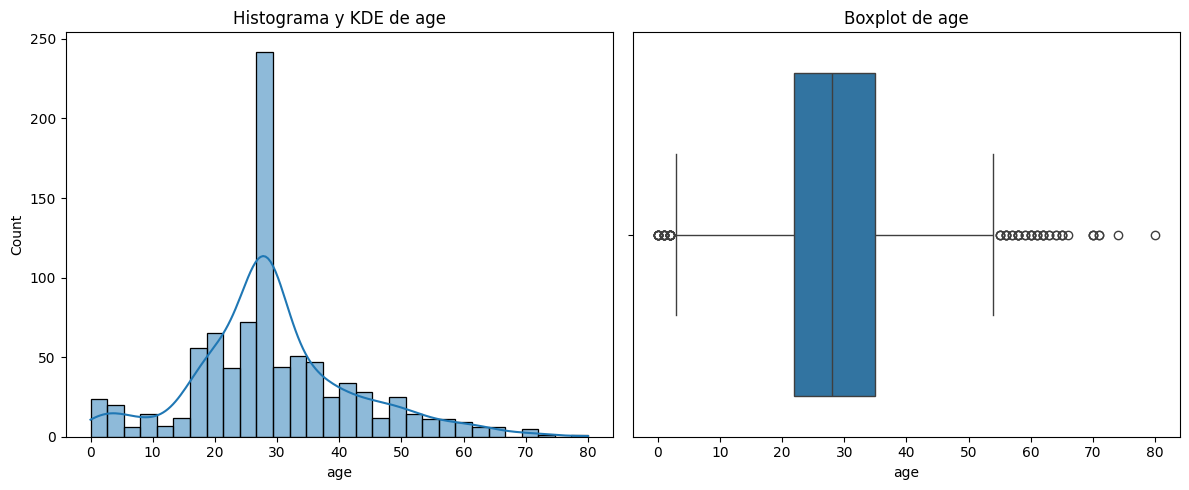

In [272]:
plot_combined_graphs(df_numericas, ['age'])

In [276]:
# Como vemos la edad media esta entre 25-35 años

In [274]:
df_numericas.describe().fare

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

(2,)


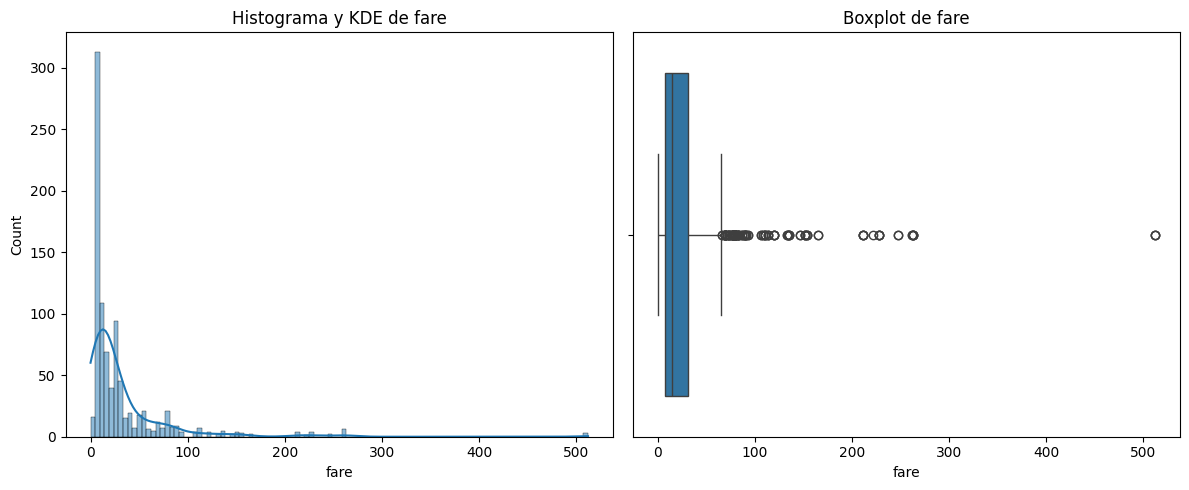

In [275]:
plot_combined_graphs(df_numericas, ['fare'])

In [278]:
# Como vemos la mayoría pagaron la tarifa de menor importe, que corresponen a los de tercera clase
#Los de segunda clase podrian ser acceptables pero los de primera pueden ser outliers

(2,)


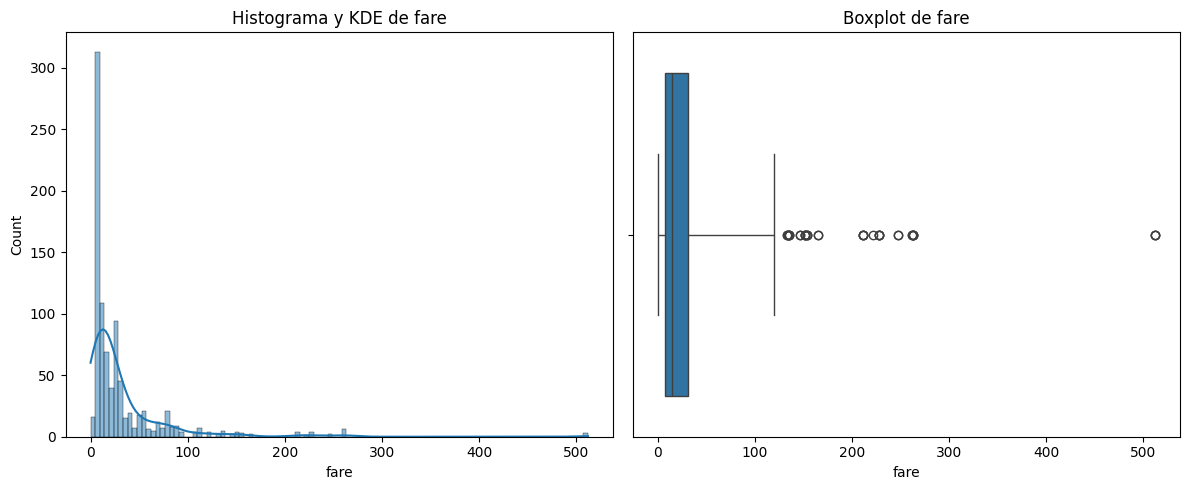

In [280]:
plot_combined_graphs(df_numericas, ['fare'], whisker_width = 4)

In [281]:
# Los de primera clase no nos interesa, me parece, se va mucho del precio medio, los consideraria outliers